<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module6/hw21_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dlbkv/AI-Step/master/data/telegram_spam.csv")

In [2]:
df


,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


In [3]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['text_type']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

class MyTokenizer:
     def __init__(self, stemmatize=False, lemmatize=False, stop_words=False):
         self.stemmatize = stemmatize
         self.stop_words = stop_words

     def __call__(self, text):
      words = word_tokenize(text)
      if self.stop_words:
        stop_words = set(stopwords.words("english"))
        words = [word for word in words if word.lower() not in stop_words]

      words = [word for word in words if word.lower() not in string.punctuation]

      if self.stemmatize:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word.lower()) for word in words]

      return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Нужно будет покомбинироватьразные варианты
tokenizer = MyTokenizer(stemmatize=True, lemmatize=True, stop_words=True)
vectorizer = TfidfVectorizer(max_features=8000, tokenizer=tokenizer)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [6]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(3000)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [7]:
pca.explained_variance_ratio_.sum()

0.8982024605296277

In [8]:
X_train.shape

(16278, 3000)

In [9]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96      2868
        spam       0.92      0.88      0.90      1202

    accuracy                           0.94      4070
   macro avg       0.94      0.92      0.93      4070
weighted avg       0.94      0.94      0.94      4070



[]

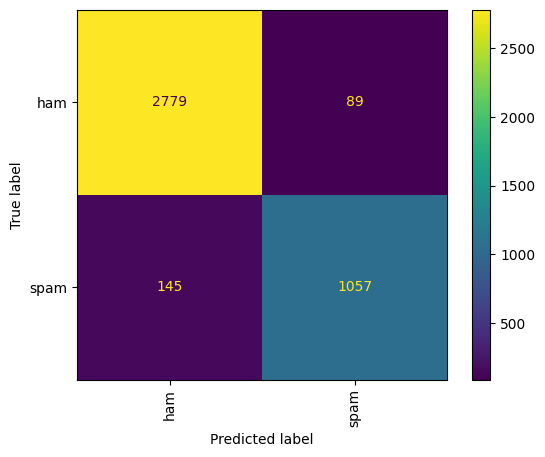

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [12]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=8000,
                                 tokenizer=<__main__.MyTokenizer object at 0x7b86b09854b0>)),
                ('pca', TruncatedSVD(n_components=3000)),
                ('model', SVC(kernel='linear'))])